# Iteração de política
#### Prof. Armando Alves Neto - Introdução ao Aprendizado por Reforço - PPGEE/UFMG

Usando a Avaliação iterativa de política para estimar $\pi^*(s)$ via um algoritmo de Programação Dinâmica.

Importando bibliotecas.

In [1]:
import numpy as np
import class_gridworld_env as cge

Definindo parâmetros principais do algoritmo.

In [2]:
GAMMA = 0.9
THETA = 1.0e-4

Criando a classe principal.

Agora temos uma política $a = \pi(s)$, inicializada com valores aleatórios.

In [3]:
class PolicyIteration:
    ##########################################
    def __init__(self):

        # environment
        self.env = cge.Gridworld_Env()
        self.size = self.env.getSize()

        # fator de desconto
        self.gamma = GAMMA

        # inicia o mundo
        self.reset()

    ##########################################
    def reset(self):

        # reseta ambiente
        self.env.reset()

        # value function 
        self.value = np.zeros((self.size, self.size))

        # uniform random policy
        nactions = len(self.env.actions)

        # politica
        self.pi = np.random.choice(nactions, (self.size, self.size))

        # quantos passos
        self.steps = 0

Equação de Bellman dado um estado $s$ e uma política $\pi(s)$:

$$
\begin{equation}
    v_\pi(s) = \sum_{s' \in \mathcal{S}, ~r} p(s', r | s, \pi(s)) \big[ r + \gamma v_\pi(s') \big]
    \end{equation}
$$

In [4]:
class PolicyIteration(PolicyIteration):
    ##########################################
    # Bellman equation
    def bellmanEquation(self, s):

        # pega a ação corrente da politica 
        action = self.env.actions[int(self.pi[s])]

        # interage com o ambiente
        sl, r, _, _ = self.env.step(s, action)

        # valor obtido
        v = r + self.gamma*self.value[sl]

        return v

Etapa de avaliação de política $\pi(s)$ (Avaliação iterativa da política).

In [5]:
class PolicyIteration(PolicyIteration):
    ##########################################
    def policyEvaluation(self, in_place=False):

        while True:
            Delta = 0.0

            # synchronous oy asynchronous mode?
            Vs  = self.value if in_place else np.empty_like(self.value)

            # para todos os estados
            for i in range(len(self.value)):
                for j in range(len(self.value[i])):

                    # estado
                    s = (i,j)

                    # apply bellman expectation equation to each state
                    v = Vs[s]
                    Vs[s] = self.bellmanEquation(s)

                    Delta = np.max([Delta, np.abs(v - Vs[s])])

            # atualiza valores
            self.value = Vs

            self.steps += 1

            # convergiu?
            if Delta < THETA: break

        return self.value

Etapa de melhoria da política $\pi(s)$.

In [6]:
class PolicyIteration(PolicyIteration):
    ##########################################
    def policyImprovement(self):

        policy_stable = True

        # para todos os estados
        for i in range(len(self.value)):
            for j in range(len(self.value[i])):

                # estado
                s = (i,j)

                # calcula a politica otima corrente para cada estado
                old_action = self.pi[s]

                # para todas as possiveis ações
                vs = []
                for a, action in enumerate(self.env.actions):
                    # interage com o ambiente
                    sl, r, _, _ = self.env.step(s, action)
                    vs.append(r + self.gamma*self.value[sl])

                self.pi[s] = np.argmax(vs)

                # nao convergiu ainda
                if old_action != self.pi[s]:
                    policy_stable = False

        return policy_stable

Roda um episódio até o algoritmo convergir.

In [7]:
class PolicyIteration(PolicyIteration):
    ##########################################
    def runEpsisode(self, in_place=False):

        iterations = 0

        while True:
            iterations += 1

            # Policy Evaluation
            value_table = self.policyEvaluation(in_place)

            # Policy Improvement
            if self.policyImprovement():
                print('Convergiu em %d iteracoes!' % iterations)
                break

        return value_table

Programa principal.

Convergiu em 3 iteracoes!
Convergiu em 103 passos!


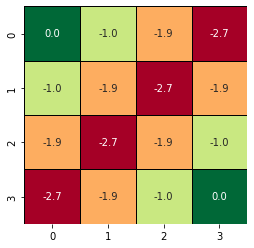

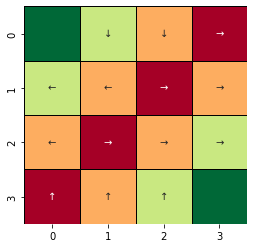

In [8]:
##########################################
if __name__ == "__main__":

    pol_ite = PolicyIteration()

    value_table = pol_ite.runEpsisode()
    print('Convergiu em %d passos!' % pol_ite.steps)

    # renderiza Figure 4.1 (Sutton and Barto)
    pol_ite.env.render(value_table, pi=pol_ite.pi)